# 1.  Giới Thiệu

Bạn có biết rằng thời tiết là một trong những yếu tố ảnh hưởng trực tiếp đến sinh hoạt, nông nghiệp và an toàn của con người mỗi ngày?
*   Từ việc lên kế hoạch cho một chuyến đi, chuẩn bị cho sản xuất nông nghiệp, cho đến phòng chống thiên tai – dự báo thời tiết chính xác đóng vai trò vô cùng quan trọng.
*   Trong bài thực hành này, chúng ta sẽ khám phá, phân tích và trực quan hóa các yếu tố thời tiết quan trọng, bao gồm nhiệt độ, độ ẩm, lượng mưa, áp suất khí quyển và tốc độ gió, nhằm tìm hiểu mối liên hệ giữa chúng với khả năng xảy ra mưa vào ngày hôm sau.
*  Trong quá trình thực hiện, chúng ta cố gắng sử dụng các biểu đồ trực quan hóa đơn giản nhưng hiệu quả, giúp người xem dễ dàng nắm bắt thông tin và rút ra kết luận có ý nghĩa từ dữ liệu thời tiết thực tế.

**1.1  Mục Tiêu Bài Toán**
*   Bài thực hành này nhằm khai phá và trực quan hóa mối quan hệ giữa các yếu tố thời tiết (nhiệt độ, độ ẩm, lượng mưa, tốc độ gió, áp suất…) và khả năng xảy ra mưa vào ngày hôm sau.
*   Thông qua việc phân tích bộ dữ liệu thời tiết được thu thập từ nhiều vị trí địa lý, nhiều điều kiện khí hậu và nhiều thời điểm khác nhau, bài thực hành hướng đến việc hiểu rõ hơn các yếu tố làm tăng hoặc giảm khả năng mưa. Đồng thời, bài thực hành sẽ trình bày kết quả dưới dạng biểu đồ trực quan, dễ hiểu và dễ phân tích.

**1.2  Câu Hỏi Giả Định**

Trong bài này, chúng ta sẽ khám phá để tìm hiểu một số câu hỏi sau:


1.   Yếu tố môi trường nào có xu hướng thay đổi rõ rệt giữa những ngày có mưa và những ngày không mưa?
2.   Các điều kiện thời tiết trong ngày hiện tại có thể phản ánh gì về khả năng mưa của ngày hôm sau?

3.   Áp suất khí quyển và tốc độ gió có thể đóng vai trò dự báo sớm cho các đợt mưa không?
4.   Nhiệt độ cao hoặc chênh lệch nhiệt độ lớn trong ngày có làm tăng xác suất mưa không?
5.   Có tồn tại mối quan hệ đáng kể nào giữa các biến liên tục và các biến phân loại trong việc dự đoán mưa không?
6.   Sự phân bố thời tiết có khác nhau giữa các địa điểm trong dữ liệu hay không?
7.   Những yếu tố nào có mức độ ảnh hưởng lớn nhất đến biến RainTomorrow?









# 2. Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import io
import pickle
import os

#3. Tiền xử lý dữ liệu
Trong phần này, bài thực hành sẽ tiến hành tải dữ liệu và mô tả chi tiết các đặc trưng có trong bộ dữ liệu.

Bộ dữ liệu WeatherAUS gồm 22 đặc trưng (features) và 1 biến mục tiêu nhị phân (binary target).

Thông tin các đặc trưng như sau:

Date: Ngày ghi nhận dữ liệu thời tiết.

Location: Địa điểm đo đạc (tỉnh/thành phố).

MinTemp: Nhiệt độ thấp nhất trong ngày (°C).

MaxTemp: Nhiệt độ cao nhất trong ngày (°C).

Rainfall: Lượng mưa đo được trong ngày (mm).

Evaporation: Lượng nước bốc hơi trong ngày (mm).

Sunshine: Số giờ nắng trong ngày.

WindGustDir: Hướng gió mạnh nhất trong ngày.

WindGustSpeed: Tốc độ gió mạnh nhất trong ngày (km/h).

WindDir9am: Hướng gió đo lúc 9 giờ sáng.

WindDir3pm: Hướng gió đo lúc 3 giờ chiều.

WindSpeed9am: Tốc độ gió lúc 9 giờ sáng (km/h).

WindSpeed3pm: Tốc độ gió lúc 3 giờ chiều (km/h).

Humidity9am: Độ ẩm lúc 9 giờ sáng (%).

Humidity3pm: Độ ẩm lúc 3 giờ chiều (%).

Pressure9am: Áp suất khí quyển lúc 9 giờ sáng (hPa).

Pressure3pm: Áp suất khí quyển lúc 3 giờ chiều (hPa).

Cloud9am: Mức độ mây bao phủ lúc 9 giờ sáng (0–8).

Cloud3pm: Mức độ mây bao phủ lúc 3 giờ chiều (0–8).

Temp9am: Nhiệt độ lúc 9 giờ sáng (°C).

Temp3pm: Nhiệt độ lúc 3 giờ chiều (°C).

RainToday: Tình trạng mưa trong ngày (Yes/No).

RainTomorrow: Biến mục tiêu (target) – ngày hôm sau có mưa hay không (Yes/No).

In [ ]:
# hiển thị dữ liệu
df = pd.read_csv("weatherAUS.csv")
print(df.head())



         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
# hiển thị info của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# thống kê mô tả
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# hiển thị các dữ liệu missing
print(df.isna().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


**Nhận xét** :
+ Các cột bị thiếu dữ liệu nặng : Evaporation , Sunshine ,Cloud3pm ,Cloud9am . Vì đây là những cột quan trọng chúng ta không thể xóa cột
Và các cột này thì dữ liệu bị thiếu rất nhiều lên đến 40% - 50% nên cũng không thể xóa hàng.

=> Điền giá những hàng bị thiếu bằng giá trị trung bị hay trung bình cũng không có nhiều ý nghĩa

**Giải pháp**:

+ Kết hợp vừa điền giá trị trung bị vừa kết hợp xóa tối ưu Xóa tối ưu : tức là chúng ta ưu tiên xóa những hàng bị thiếu dữ liệu ở nhiều cột trước.

Ví dụ hàng 1 cột Evaporation , RainToday , Cloud9am ... đều bị thiếu thì chúng ta nên ưu tiên xóa trước để tối ưu cả những cột bị thiếu dữ liệu ít
Sau khi không thể xóa tối ưu thì chúng ta sẽ xóa hàng như bình thường . Sau khi xóa mà các cột dữ liệu thiếu chỉ còn dưới 5000 mẫu chúng ta sẽ tiến hành điền giá trị trung vị vào

# **TEst eda trước làm sạch**

array([[<Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Pressure3pm'}>, <Axes: >]], dtype=object)

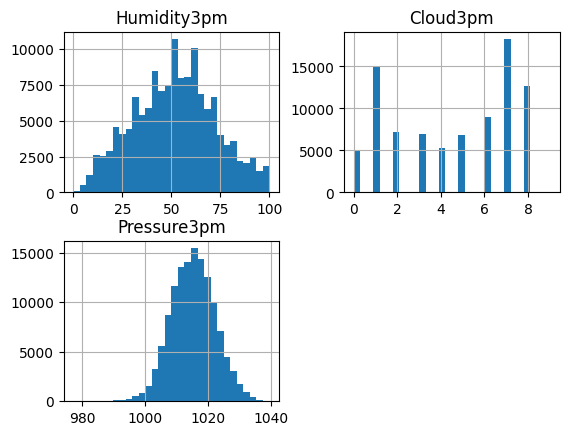

In [ ]:
df[['Humidity3pm','Cloud3pm','Pressure3pm']].hist(bins=30)




# **end**

In [ ]:
# Chuyển đổi y/n => 1/0
df["RainToday"] = df["RainToday"].map({"No":0, "Yes":1})
df["RainTomorrow"] = df["RainTomorrow"].map({"No":0, "Yes":1})

chuyển đổi y/s sang 0/1 để chuẩn hóa data dễ hơn cho KNN

In [ ]:
# 1. Thêm cột đếm số lượng giá trị thiếu của từng hàng
df["missing_count"] = df.isna().sum(axis=1)
# 2. Xóa tối ưu:
# Xoá những hàng bị thiếu quá nhiều cột (>=4 cột)
#→ Điều chỉnh threshold tùy độ nhiễu

threshold = 4
df = df[df["missing_count"] < threshold]

# Xóa cột auxiliary không cần thiết nữa
df = df.drop(columns=["missing_count"])
# 3. Kiểm tra lại số lượng dữ liệu thiếu sau khi xoá tối ưu
missing_after_drop = df.isna().sum()

print("Số lượng giá trị thiếu sau khi xoá tối ưu:")
print(missing_after_drop)
# 4. Tiếp tục xử lý thiếu còn lại
#    Nếu số lượng thiếu < 5000 → điền median/mode
num_cols  = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols  = df.select_dtypes(include=['object']).columns

for col in df.columns:
    if df[col].isna().sum() > 0:   # Nếu còn bị thiếu
        if df[col].isna().sum() < 5000:
            if col in num_cols:
                df[col] = df[col].fillna(df[col].median())    # Điền median cho numeric
            else:
                df[col] = df[col].fillna(df[col].mode()[0])   # Điền mode cho categorical

# 5. Kiểm tra lại sau khi xử lý toàn bộ
print("\nSau khi xử lý hoàn toàn missing values:")
print(df.isna().sum())




Số lượng giá trị thiếu sau khi xoá tối ưu:
Date                 0
Location             0
MinTemp             61
MaxTemp             33
Rainfall           126
Evaporation      16224
Sunshine         21864
WindGustDir       3958
WindGustSpeed     3946
WindDir9am        2992
WindDir3pm         318
WindSpeed9am        33
WindSpeed3pm        14
Humidity9am        237
Humidity3pm        225
Pressure9am        116
Pressure3pm         68
Cloud9am         12221
Cloud3pm         13674
Temp9am             68
Temp3pm             15
RainToday          126
RainTomorrow       628
dtype: int64

Sau khi xử lý hoàn toàn missing values:
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      16224
Sunshine         21864
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressu

Khi số lượng missing giảm xuống mức chấp nhận được, chúng ta áp dụng phương pháp Iterative Imputer (MICE) để dự đoán các giá trị bị thiếu.

Ưu điểm:

MICE không điền bừa bằng giá trị trung bình

Mà dự đoán dựa trên quan hệ giữa các biến, ví dụ:

Sunshine liên quan đến Evaporation

Cloud3pm liên quan đến Humidity3pm

Cloud9am liên quan đến Fog/Humidity9am

Giữ lại sự tương quan tự nhiên của các biến trong mô hình thời tiết

=> Điều này giúp mô hình dự báo mưa chính xác hơn và không bị méo phân bố dữ liệu.

In [ ]:
# điền các giá trị còn thiếu bằng MICE
cols_important = ["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Lấy các cột số để xử lý bằng MICE
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Tạo imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# Áp dụng cho toàn bộ các cột numeric
df[num_cols] = imputer.fit_transform(df[num_cols])
# dien
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df.isna().sum()




,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


MICE dự đoán giá trị thiếu bằng cách chọn 1 cột bị thiếu làm biến mục tiêu, dùng tất cả các cột còn lại làm feature, huấn luyện mô hình hồi quy để dự đoán phần bị thiếu. Sau đó chuyển sang cột tiếp theo, lặp lại nhiều vòng cho đến khi giá trị ổn định

=> Sau khi dùng mice đã xử lý xong toàn bộ các phần dữ liệu bị thiếu

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000,95457.000000
mean,12.731719,23.532584,2.428950,5.321537,7.499289,40.650387,14.997947,19.417120,67.778183,50.841258,1017.425251,1015.064014,4.402054,4.462585,17.392507,22.038350,0.230638,0.226102
std,6.377100,7.102815,8.841494,4.009225,3.702047,13.188846,8.630616,8.587304,19.114630,20.744709,7.078280,7.026098,2.784873,2.616906,6.528581,6.958908,0.421243,0.418308
min,-8.000000,4.100000,0.000000,-3.108381,-1.594777,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-1.497087,0.000000,-1.300000,1.700000,0.000000,0.000000
25%,8.000000,18.000000,0.000000,2.600000,4.700000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.700000,1010.300000,1.639525,2.000000,12.400000,16.700000,0.000000,0.000000
50%,12.400000,22.900000,0.000000,4.600000,8.100000,39.000000,13.000000,19.000000,69.000000,52.000000,1017.400000,1015.000000,5.000000,5.000000,16.900000,21.400000,0.000000,0.000000
75%,17.400000,28.800000,0.800000,7.200000,10.500000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.200000,1019.800000,7.000000,7.000000,22.200000,27.100000,0.000000,0.000000
max,33.900000,48.100000,371.000000,82.400000,17.351493,135.000000,69.000000,76.000000,100.000000,100.000000,1040.900000,1038.900000,10.301082,11.981620,40.200000,46.700000,1.000000,1.000000


Nhận xét: Evaporation,Sunshine,Cloud9am / Cloud3pm có giá trị âm -> bất thường

Bởi vì các giá trị evaporation( lượng nước bốc hơi trong ngày), sunshine(số thời gian nắng trong ngày) và mây lúc 9 giò sáng và 3 giờ chiều không nhận giá trị âm vì nó không thực tế

In [ ]:
df["Evaporation"] = df["Evaporation"].clip(lower=0)
df["Sunshine"] = df["Sunshine"].clip(lower=0)
df["Cloud9am"] = df["Cloud9am"].clip(0, 9)
df["Cloud3pm"] = df["Cloud3pm"].clip(0, 9)



thay thế các giá trị nhỏ hơn 0 bằng 0


# 4.Biểu đồ hóa dữ liệu
Các yếu tố môi trường ảnh hưởng đến ngày mưa và không mưa


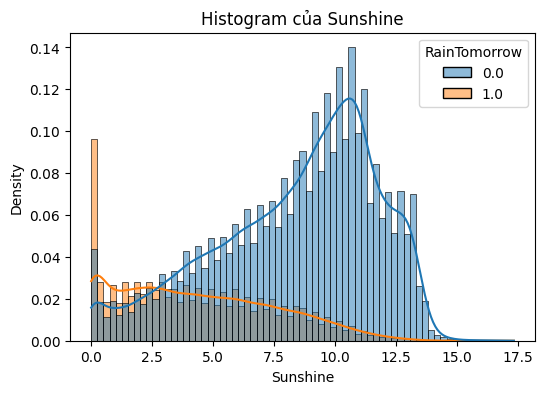

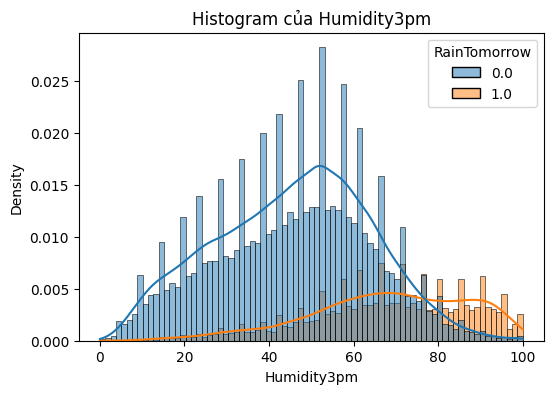

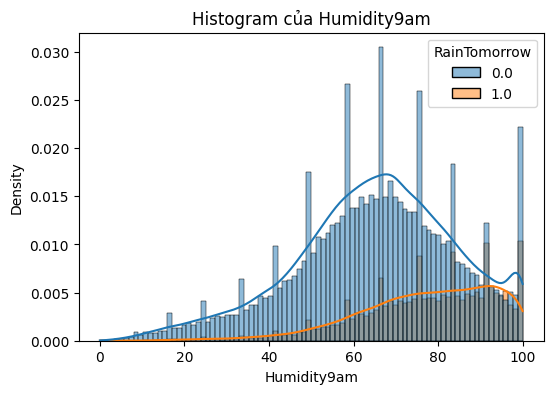

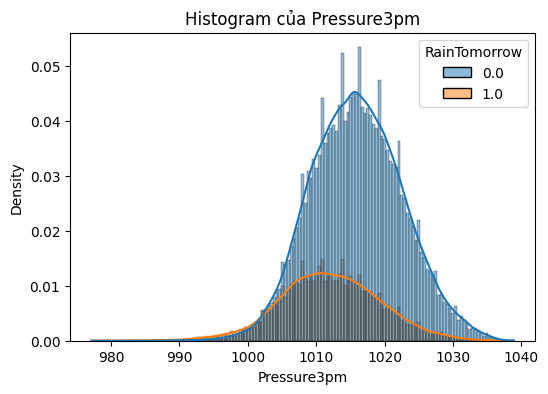

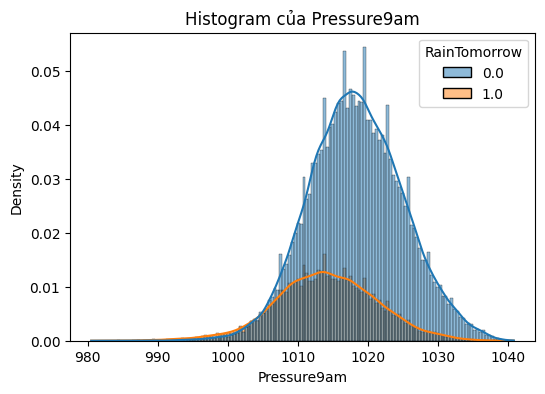

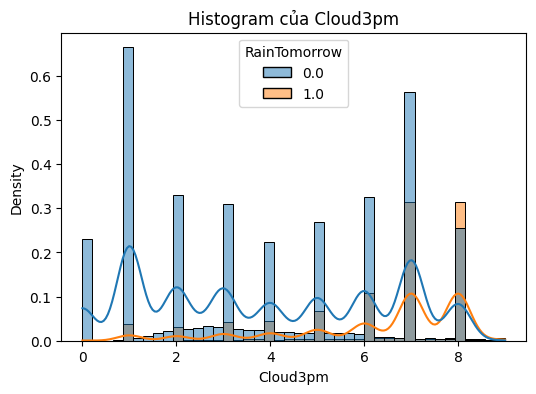

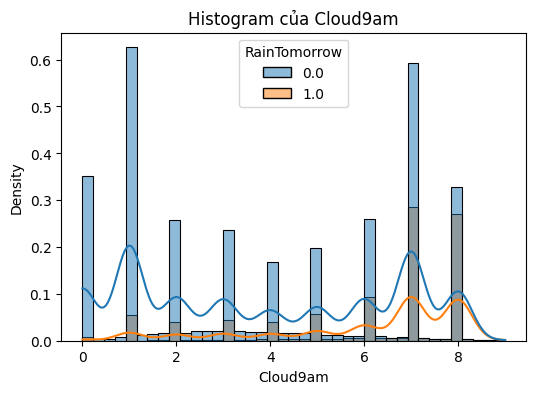

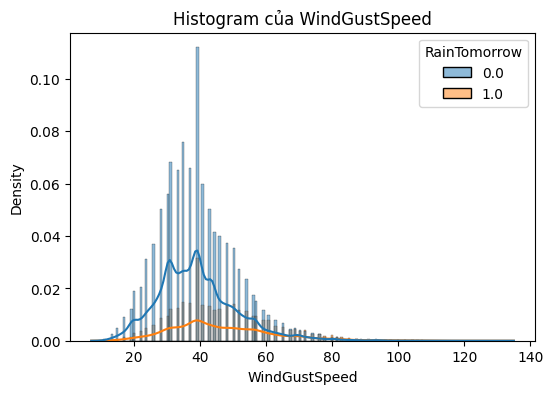

In [ ]:
# ảnh hưởng của các cột dưới đến mưa ngày mai
cols = ["Sunshine","Humidity3pm","Humidity9am","Pressure3pm","Pressure9am",
        "Cloud3pm","Cloud9am","WindGustSpeed"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="RainTomorrow", kde=True, stat="density")
    plt.title(f"Histogram của {col}")
    plt.show()


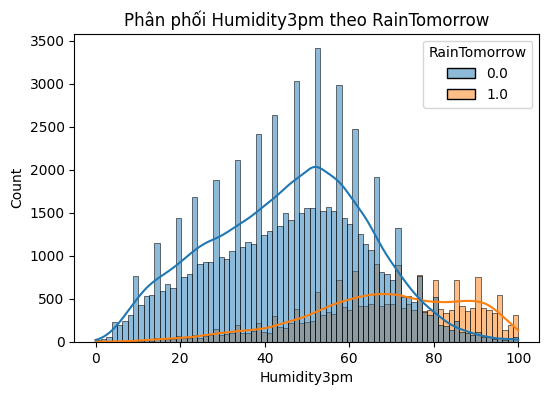

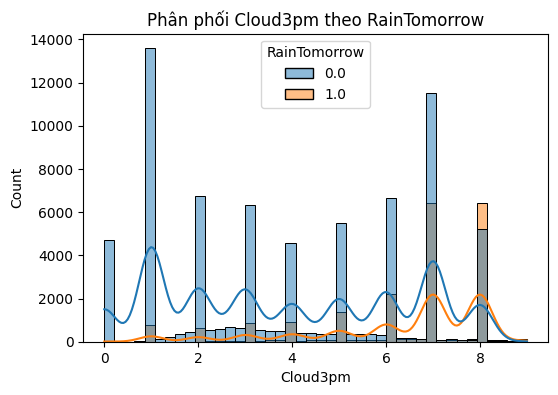

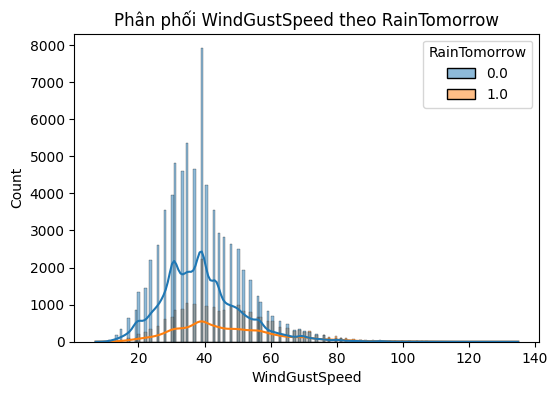

In [ ]:
cols = ["Humidity3pm","Cloud3pm","WindGustSpeed"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="RainTomorrow", kde=True)
    plt.title(f"Phân phối {col} theo RainTomorrow")
    plt.show()


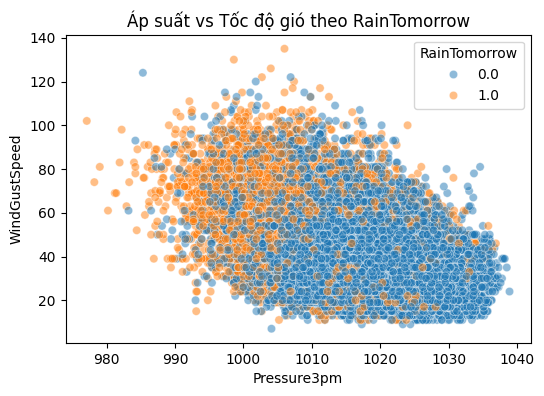

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Pressure3pm", y="WindGustSpeed",
                hue="RainTomorrow", alpha=0.5)
plt.title("Áp suất vs Tốc độ gió theo RainTomorrow")
plt.show()


Áp suất càng cao → gió giật càng thấp → chủ yếu là ngày không mưa (màu xanh).

Áp suất thấp + gió mạnh → xuất hiện cả hai nhóm, nhưng mưa nhiều hơn.

Biểu đồ cho thấy những ngày có áp suất buổi chiều thấp thường có khả năng mưa cao hơn, thể hiện qua mật độ điểm màu cam tăng ở vùng Pressure3pm < 1005 hPa. Tốc độ gió giật mạnh cũng liên quan đến khả năng mưa nhưng mức độ ảnh hưởng không mạnh. Hai đặc trưng này có sự chồng lấn đáng kể giữa hai nhóm nên không thể quyết định mưa–không mưa một cách độc lập, nhưng vẫn đóng vai trò hỗ trợ quan trọng cho mô hình dự báo khi kết hợp với các biến thời tiết khác.

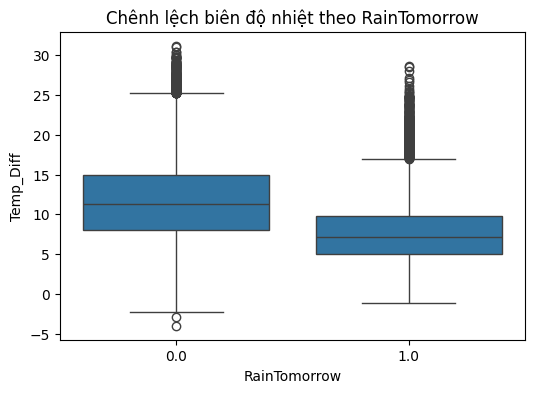

In [ ]:
df["Temp_Diff"] = df["MaxTemp"] - df["MinTemp"]

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="RainTomorrow", y="Temp_Diff")
plt.title("Chênh lệch biên độ nhiệt theo RainTomorrow")
plt.show()


Nhóm không mưa (RainTomorrow = 0) có chênh lệch nhiệt độ lớn hơn. Median của Temp_Diff ở nhóm không mưa cao hơn rõ rệt so với nhóm có mưa. Điều này cho thấy những ngày nắng mạnh → biên độ nhiệt lớn → ít có khả năng mưa.

Nhóm có mưa (RainTomorrow = 1) có chênh lệch nhiệt độ thấp hơn Median và phần lớn giá trị Temp_Diff nằm dưới nhóm không mưa. Vì khi trời nhiều mây, nhiệt độ tăng/giảm ít → biên độ nhiệt nhỏ.

👉 Đây là dấu hiệu thời tiết rõ ràng:
Trời âm u → biên độ nhiệt nhỏ → dễ mưa.

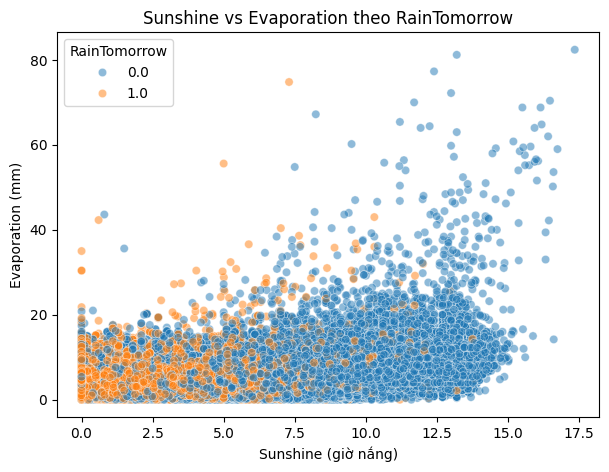

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Sunshine",
    y="Evaporation",
    hue="RainTomorrow",
    alpha=0.5
)
plt.title("Sunshine vs Evaporation theo RainTomorrow")
plt.xlabel("Sunshine (giờ nắng)")
plt.ylabel("Evaporation (mm)")
plt.show()






Nhóm không mưa (RainToday = 0) có độ ẩm thấp hơn.Đường màu xanh (không mưa) phủ rộng ở vùng 20% – 60%. Đỉnh phân bố tập trung khoảng 40–50%. Điều này phản ánh thực tế: hôm nay trời khô ráo → độ ẩm thấp hơn.

Nhóm có mưa (RainToday = 1) có độ ẩm cao hơn rõ rệt. Đường màu cam (có mưa) dịch mạnh sang vùng 60–90%. Đỉnh phân bố khoảng 70–80%. Điều này chính xác với khí tượng học:Trời mưa thì độ ẩm luôn cao.

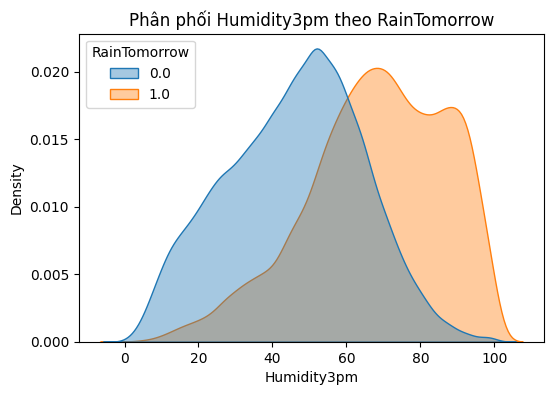

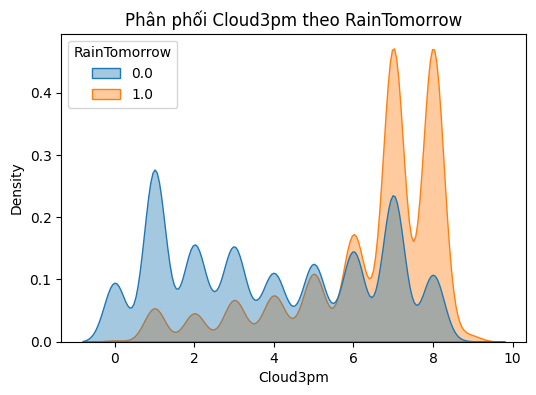

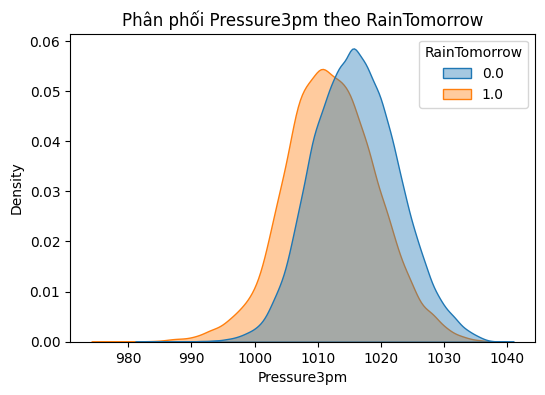

In [ ]:
cols = ["Humidity3pm","Cloud3pm","Pressure3pm"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="RainTomorrow", fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Phân phối {col} theo RainTomorrow")
    plt.show()




| Feature         | Mức tách biệt   | Ý nghĩa khí tượng                       | Vai trò dự báo  |
| --------------- | --------------- | --------------------------------------- | --------------- |
| **Pressure3pm** | Trung bình – rõ | Áp suất thấp → khả năng mưa             | Quan trọng      |
| **Cloud3pm**    | Rất rõ          | Mây dày là điều kiện tiên quyết của mưa | Rất quan trọng  |
| **Humidity3pm** | Rất rõ          | Độ ẩm cao → hơi nước nhiều → dễ mưa     | Quan trọng nhất |

Cả ba yếu tố Humidity3pm, Cloud3pm và Pressure3pm đều thể hiện sự khác biệt rõ rệt giữa hai nhóm RainTomorrow = 1 và 0. Điều này xác nhận các yếu tố liên quan đến độ ẩm, lượng mây và áp suất buổi chiều đóng vai trò cực kỳ quan trọng trong dự báo mưa vào ngày hôm sau. Ba feature này cũng là nhóm đặc trưng mạnh nhất hỗ trợ mô hình học máy dự đoán chính xác hơn.


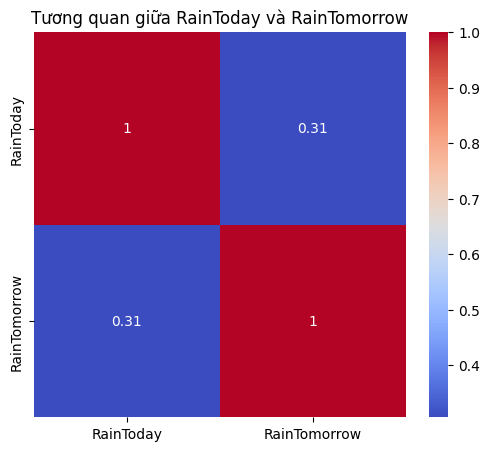

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[["RainToday","RainTomorrow"]].replace({"No":0,"Yes":1}).corr(), annot=True, cmap="coolwarm")
plt.title("Tương quan giữa RainToday và RainTomorrow")
plt.show()




Biểu đồ cho thấy RainToday và RainTomorrow có tương quan dương khoảng 0.31. Điều này nghĩa là nếu hôm nay mưa thì ngày mai cũng có khả năng cao mưa tiếp. Đây là tín hiệu khí tượng hợp lý và là đặc trưng rất quan trọng trong bài toán dự báo mưa.”

**Chuẩn hóa dữ liệu trước khi đưa vào mô hình**



In [ ]:
# Chuyển Date sang dạng datetime
df["Date"] = pd.to_datetime(df["Date"])

# Tạo cột Month (tháng) – yếu tố khí tượng có ý nghĩa
df["Month"] = df["Date"].dt.month

# Xóa toàn bộ cột thời gian không cần thiết
df = df.drop(columns=["Date"])



Giữ lại cột month vì ở úc các mùa khá rõ rết là 2 mùa mưa và khô

In [ ]:
# Encode hướng gió
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["WindGustDir"] = le.fit_transform(df["WindGustDir"])
df["WindDir9am"]  = le.fit_transform(df["WindDir9am"])
df["WindDir3pm"]  = le.fit_transform(df["WindDir3pm"])



In [ ]:
df.select_dtypes(include=['object']).columns


Index(['Location'], dtype='object')

In [ ]:
df = df.drop(columns=["Location"])

In [ ]:
# TÁCH FEATURES (X) VÀ TARGET (y)
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]


In [ ]:
# CHIA TẬP TRAIN / TEST (80/20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
feature_names = X_train.columns.tolist()
pickle.dump(feature_names, open("feature_names.pkl", "wb"))


In [ ]:
list(df.columns)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Temp_Diff',
 'Month']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


knn_accuracy  = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall    = recall_score(y_test, y_pred_knn)
knn_f1        = f1_score(y_test, y_pred_knn)

print("=== KNN Evaluation Results ===")
print("Accuracy :", knn_accuracy)
print("Precision:", knn_precision)
print("Recall   :", knn_recall)
print("F1-score :", knn_f1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


=== KNN Evaluation Results ===
Accuracy : 0.8421852084642782
Precision: 0.6963855421686747
Recall   : 0.5355570998378504
F1-score : 0.6054733534110253

Confusion Matrix:
[[13767  1008]
 [ 2005  2312]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     14775
         1.0       0.70      0.54      0.61      4317

    accuracy                           0.84     19092
   macro avg       0.78      0.73      0.75     19092
weighted avg       0.83      0.84      0.83     19092



Accuracy (83.6%) – Tỷ lệ dự đoán đúng tổng thể khá tốt

Precision (0.693) – KNN dự đoán "có mưa" khá chính xác

Recall (0.496) – KNN bỏ sót nhiều ngày có mưa

F1-score (0.578) – mức trung bình

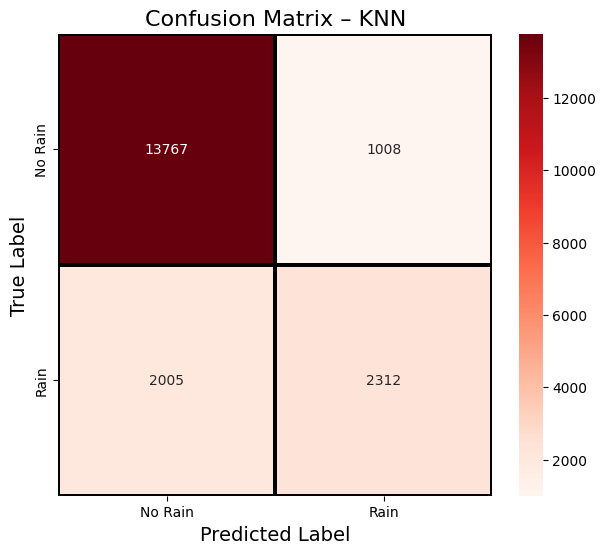

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="Reds",
    linewidths=1.5,
    linecolor='black'
)

plt.title("Confusion Matrix – KNN", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Gắn nhãn trục dễ hiểu hơn
plt.xticks([0.5, 1.5], ["No Rain", "Rain"])
plt.yticks([0.5, 1.5], ["No Rain", "Rain"])

plt.show()

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_accuracy  = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall    = recall_score(y_test, y_pred_rf)
rf_f1        = f1_score(y_test, y_pred_rf)

print("=== Random Forest Evaluation Results ===")
print("Accuracy :", rf_accuracy)
print("Precision:", rf_precision)
print("Recall   :", rf_recall)
print("F1-score :", rf_f1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


=== Random Forest Evaluation Results ===
Accuracy : 0.8643410852713178
Precision: 0.7832076090521483
Recall   : 0.5531619179986101
F1-score : 0.6483844691827315

Confusion Matrix:
[[14114   661]
 [ 1929  2388]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     14775
         1.0       0.78      0.55      0.65      4317

    accuracy                           0.86     19092
   macro avg       0.83      0.75      0.78     19092
weighted avg       0.86      0.86      0.86     19092



Accuracy 86.6% – cao hơn KNN và phản ánh dự đoán tổng thể tốt hơn

Precision 79.6% – Dự đoán "có mưa" khá đáng tin

Recall 54.7% – Phát hiện mưa tốt hơn KNN nhưng vẫn chưa cao

F1-score 0.648 – Cân bằng giữa Precision và Recall khá tốt

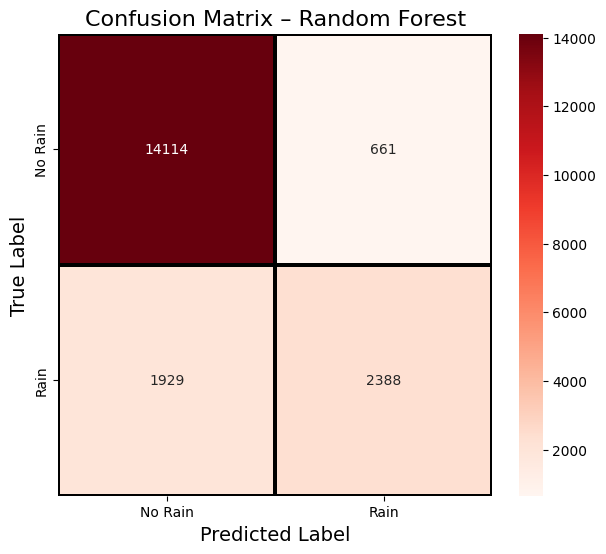

In [ ]:
# Confusion matrix RF (dùng đúng số liệu bạn đã cung cấp)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Reds",
    linewidths=1.5,
    linecolor='black'
)

plt.title("Confusion Matrix – Random Forest", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Gắn nhãn trục dễ nhìn
plt.xticks([0.5, 1.5], ["No Rain", "Rain"])
plt.yticks([0.5, 1.5], ["No Rain", "Rain"])

plt.show()

          Feature  Importance
12    Humidity3pm    0.140193
4        Sunshine    0.110987
14    Pressure3pm    0.062399
16       Cloud3pm    0.057425
20      Temp_Diff    0.057010
13    Pressure9am    0.054256
6   WindGustSpeed    0.050764
2        Rainfall    0.043484
11    Humidity9am    0.042425
18        Temp3pm    0.037257
17        Temp9am    0.035875
0         MinTemp    0.035782
3     Evaporation    0.035735
1         MaxTemp    0.035423
15       Cloud9am    0.033383
10   WindSpeed3pm    0.029175
9    WindSpeed9am    0.027222
7      WindDir9am    0.025647
8      WindDir3pm    0.025095
5     WindGustDir    0.024313
21          Month    0.021638
19      RainToday    0.014511


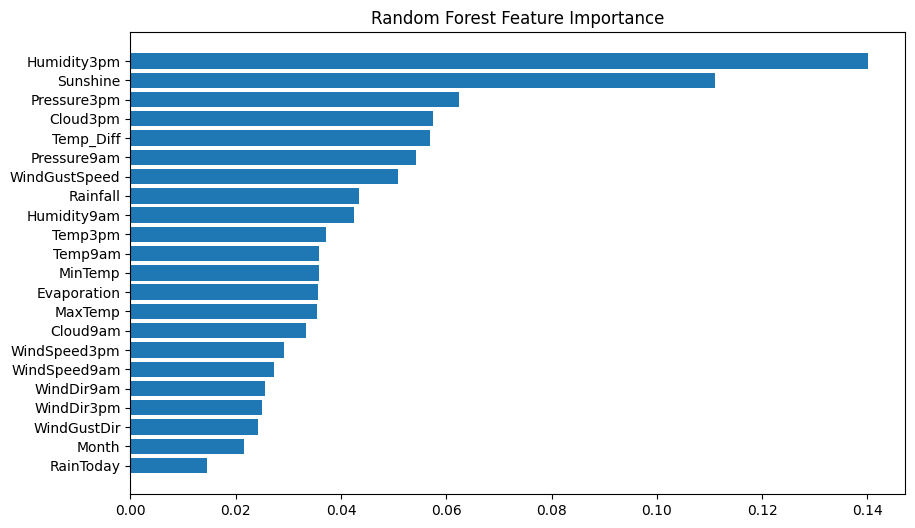

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})


# In bảng
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.show()


Như hình ta thấy 2 biến ảnh hưởng rõ rệt đến kết quả của mô hình là humidity3pm( độ ẩm lúc 3 giờ chiều) và Sunshine(Số thời gian nắng trong ngày) vì:


*   humidity3pm: Độ ẩm lúc 3 giờ chiều là yếu tố quan trọng nhất vì đây là thời điểm gần nhất trước ngày hôm sau, phản ánh được mức độ ngưng tụ hơi nước, mây và điều kiện đối lưu ( những yếu tố ảnh hưởng đến lượng mưa vào ngày mai)
*   sunshine( số thời gian nắng): có xu hướng tác động ngược vì số nắng càng thấp thì mây càng nhiều -> độ ẩm càng cao nên tạo điều kiện thuận lợi cho mưa



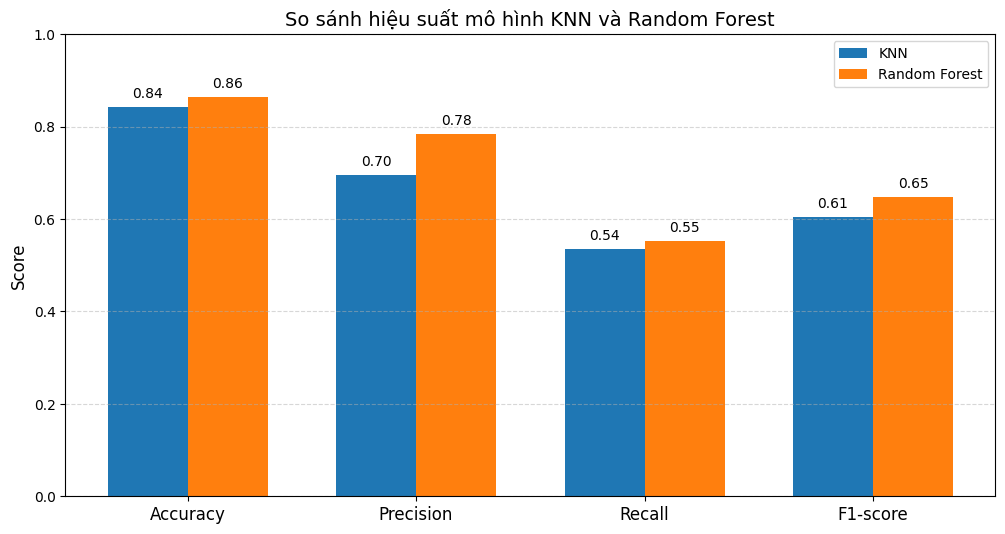

In [ ]:

# Danh sách metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Dùng đúng tên biến đã tạo ở phần đánh giá KNN và RF
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
rf_scores  = [rf_accuracy,  rf_precision,  rf_recall,  rf_f1]

x = np.arange(len(metrics))
width = 0.35  # độ rộng cột

plt.figure(figsize=(12,6))

# Vẽ cột KNN và RF
knn_bar = plt.bar(x - width/2, knn_scores, width, label='KNN')
rf_bar  = plt.bar(x + width/2, rf_scores, width, label='Random Forest')

# Gắn tên trục
plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.title("So sánh hiệu suất mô hình KNN và Random Forest", fontsize=14)
plt.legend()

# Hiển thị giá trị trên đầu cột (giúp slide đẹp hơn)
for bar in knn_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f"{height:.2f}", ha='center', fontsize=10)

for bar in rf_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f"{height:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


có thể thấy các dei

**Demo**

In [ ]:
X_train.columns


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Temp_Diff', 'Month'],
      dtype='object')

In [ ]:
cols = pickle.load(open("feature_names.pkl", "rb"))
print(cols)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Temp_Diff', 'Month']


In [ ]:

pickle.dump(rf, open("rf_model.pkl", "wb"))
pickle.dump(knn, open("knn_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [ ]:
list(df.columns)


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Temp_Diff',
 'Month']

In [ ]:
os.listdir()


['.config',
 'rf_model.pkl',
 'feature_names.pkl',
 'knn_model.pkl',
 'weatherAUS.csv',
 'scaler.pkl',
 '.ipynb_checkpoints',
 'sample_data']

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle


st.set_page_config(page_title="Dự báo mưa ngày mai", layout="centered")

# Load models
rf_model = pickle.load(open("rf_model.pkl", "rb"))
knn_model = pickle.load(open("knn_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
feature_names = pickle.load(open("feature_names.pkl", "rb"))   # danh sách cột gốc mô hình đã train

st.title("🌦️ Dự báo RainTomorrow – Demo KNN & Random Forest")
st.write("Hãy nhập đầy đủ các thông tin thời tiết để mô hình dự đoán ngày mai có mưa hay không.")

# ===== INPUT FORM =====

st.subheader("🔧 Nhập dữ liệu thời tiết:")

MinTemp = st.slider("MinTemp (°C)", -10.0, 35.0, 10.0)
MaxTemp = st.slider("MaxTemp (°C)", 0.0, 50.0, 25.0)
Rainfall = st.slider("Rainfall (mm)", 0.0, 300.0, 0.0)
Evaporation = st.slider("Evaporation (mm)", 0.0, 25.0, 5.0)
Sunshine = st.slider("Sunshine (hours)", 0.0, 15.0, 8.0)

WindGustDir = st.selectbox("WindGustDir", options=list(range(0, 16)))  # encoded
WindGustSpeed = st.slider("WindGustSpeed (km/h)", 0, 150, 40)

WindDir9am = st.selectbox("WindDir9am", options=list(range(0, 16)))     # encoded
WindDir3pm = st.selectbox("WindDir3pm", options=list(range(0, 16)))     # encoded

WindSpeed9am = st.slider("WindSpeed9am (km/h)", 0, 80, 10)
WindSpeed3pm = st.slider("WindSpeed3pm (km/h)", 0, 80, 15)

Humidity9am = st.slider("Humidity9am (%)", 0, 100, 60)
Humidity3pm = st.slider("Humidity3pm (%)", 0, 100, 50)

Pressure9am = st.slider("Pressure9am (hPa)", 980.0, 1045.0, 1015.0)
Pressure3pm = st.slider("Pressure3pm (hPa)", 980.0, 1045.0, 1012.0)

Cloud9am = st.slider("Cloud9am (0–8)", 0, 8, 4)
Cloud3pm = st.slider("Cloud3pm (0–8)", 0, 8, 4)

Temp9am = st.slider("Temp9am (°C)", 0.0, 40.0, 18.0)
Temp3pm = st.slider("Temp3pm (°C)", 0.0, 45.0, 25.0)

RainToday = st.selectbox("RainToday", ["No", "Yes"])
RainToday = 1 if RainToday == "Yes" else 0

Month = st.slider("Month", 1, 12, 6)

Temp_Diff = MaxTemp - MinTemp

# ===== BUILD FEATURE VECTOR =====

row = {col: 0 for col in feature_names}  # tạo đủ cột như mô hình train

# gán giá trị vào đúng cột
row.update({
    "MinTemp": MinTemp,
    "MaxTemp": MaxTemp,
    "Rainfall": Rainfall,
    "Evaporation": Evaporation,
    "Sunshine": Sunshine,
    "WindGustDir": WindGustDir,
    "WindGustSpeed": WindGustSpeed,
    "WindDir9am": WindDir9am,
    "WindDir3pm": WindDir3pm,
    "WindSpeed9am": WindSpeed9am,
    "WindSpeed3pm": WindSpeed3pm,
    "Humidity9am": Humidity9am,
    "Humidity3pm": Humidity3pm,
    "Pressure9am": Pressure9am,
    "Pressure3pm": Pressure3pm,
    "Cloud9am": Cloud9am,
    "Cloud3pm": Cloud3pm,
    "Temp9am": Temp9am,
    "Temp3pm": Temp3pm,
    "RainToday": RainToday,
    "Temp_Diff": Temp_Diff,
    "Month": Month
})

# chuyển thành DataFrame
X_input = pd.DataFrame([row])

# scale
X_scaled = scaler.transform(X_input)

# ===== CHỌN MÔ HÌNH =====
st.subheader("📌 Chọn mô hình:")
model_choice = st.radio("Model:", ["Random Forest", "KNN"])

if st.button("🔍 Dự đoán"):
    model = rf_model if model_choice == "Random Forest" else knn_model
    y_pred = model.predict(X_scaled)[0]
    prob = model.predict_proba(X_scaled)[0][1]

    if y_pred == 1:
        st.success(f"🌧️ **Ngày mai có khả năng mưa** — Xác suất: {prob:.2f}")
    else:
        st.info(f"☀️ **Ngày mai không mưa** — Xác suất mưa: {prob:.2f}")

st.markdown("---")
st.caption("© 2025 Weather Prediction Demo – Full Feature Version")




Writing app.py


In [ ]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!sudo dpkg -i cloudflared-linux-amd64.deb

!pip install streamlit -q
!streamlit --version


Selecting previously unselected package cloudflared.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.7 MB/s eta 0:00:00
Streamlit, version 1.52.2


In [ ]:
!nohup streamlit run app.py --server.port 8501 --server.headless true > streamlit.log 2>&1 &


In [ ]:
!ps -ax | grep streamlit


   2216 ?        R      0:00 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.headless true
   2217 ?        S      0:00 /bin/bash -c ps -ax | grep streamlit
   2219 ?        S      0:00 grep streamlit


In [ ]:
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate


2025-12-30T01:39:02Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-12-30T01:39:02Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-12-30T01:39:06Z INF +--------------------------------------------------------------------------------------------+
2025-12-30T01:39:06Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-12-30T01:39:06Z INF |  https://toys-essentials-residence-cord.trycloudflare.